In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from helper import charts

In [2]:
# Defining
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,
                                    input_shape=(1,)))

    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate==my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""
    history = model.fit(x=feature,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)
    return history


In [3]:
#sample data
my_feature = [1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0]
my_label   = [5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2]
my_df = pd.DataFrame({
    "feature":my_feature,
    "label":my_label})

my_df

,feature,label
0,1.0,5.0
1,2.0,8.8
2,3.0,9.6
3,4.0,14.2
4,5.0,18.8
5,6.0,19.5
6,7.0,21.4
7,8.0,26.8
8,9.0,28.9
9,10.0,32.0


In [4]:
# first attempt
learning_rate = 0.01
epochs = 30
batch_size = 5

model = build_model(learning_rate)
history = train_model(model, my_df["feature"], my_df["label"], epochs, batch_size)

Epoch 1/30
3/3 [==============================] - 0s 4ms/step - loss: 124.6246 - root_mean_squared_error: 11.1635
Epoch 2/30
3/3 [==============================] - 0s 2ms/step - loss: 59.8832 - root_mean_squared_error: 7.7384
Epoch 3/30
3/3 [==============================] - 0s 3ms/step - loss: 37.6621 - root_mean_squared_error: 6.1369
Epoch 4/30
3/3 [==============================] - 0s 2ms/step - loss: 17.9746 - root_mean_squared_error: 4.2397
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 32.6488 - root_mean_squared_error: 5.7139
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 4.0782 - root_mean_squared_error: 2.0195
Epoch 7/30
3/3 [==============================] - 0s 3ms/step - loss: 10.7503 - root_mean_squared_error: 3.2788
Epoch 8/30
3/3 [==============================] - 0s 2ms/step - loss: 8.6378 - root_mean_squared_error: 2.9390
Epoch 9/30
3/3 [==============================] - 0s 2ms/step - loss: 1.7062 - root_mean_squared_error: 

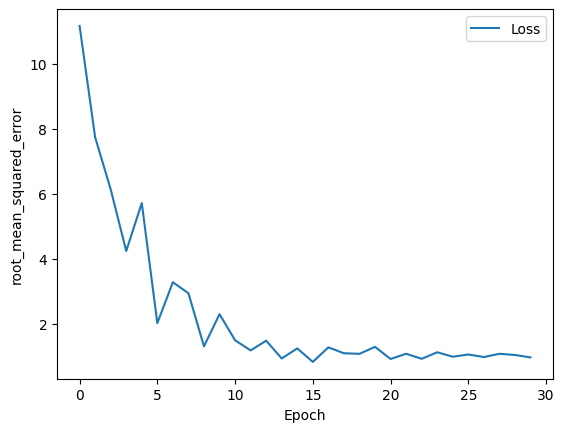

In [5]:
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]
charts.plot_training_loss(rmse)

1/1 [==============================] - 0s 64ms/step


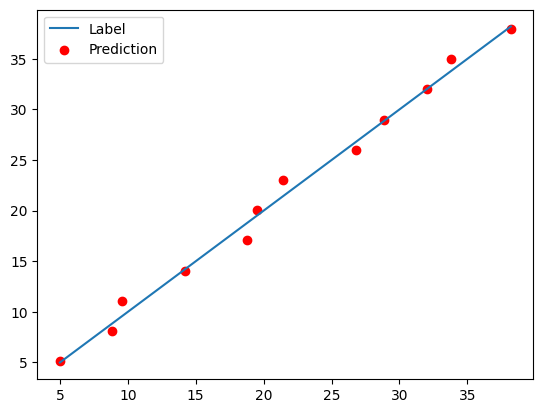

In [6]:
my_df["prediction"] = model.predict(my_df["feature"])
charts.plot_model_accuracy(df=my_df, label_key="label")